# POSTTEST 5

## IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## MEMBACA DATA

In [38]:
df = pd.read_csv("glass.csv")

In [65]:
df.tail(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Unnamed: 10
204,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,headlamps,NaN
205,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,headlamps,NaN
206,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,headlamps,NaN
207,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,headlamps,NaN
208,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,headlamps,NaN
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,headlamps,NaN
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,headlamps,NaN
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,headlamps,NaN
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,headlamps,NaN
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,headlamps,NaN


## DATA SPLITTING

In [46]:
# Price, Engine Capacity, Mark Encoded menjadi feature
# Model menjadi Target
X = df[['RI','Na','Mg','Al','Si','K','Ca']]
Y = df['Type']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

# ALGORITMA

## KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
modelKNN = KNeighborsClassifier(n_neighbors = 5)

In [51]:
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

### AKURASI TESTING MENGGUNAKAN KNN

In [52]:
modelKNN.score(X_test, Y_test)

0.813953488372093

### MENCOBA PREDIKSI MENGGUNAKAN KNN

In [56]:
glass =[[1.5,13,3,1.3,72,0.5,8]]
modelKNN.predict(glass)

C:\Users\KYC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['building'], dtype=object)

## DECISION TREE

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
modelDT = DecisionTreeClassifier().fit(X_train,Y_train)

### AKURASI TESTING MENGGUNAKAN DECISION TREE

In [61]:
modelDT.score(X_test,Y_test)

0.7209302325581395

### MENCOBA PREDIKSI MENGGUNAKAN DECISION TREE

In [75]:
glass =[[1.5,14.2,0,2,73,0,9]]
modelDT.predict(glass)

C:\Users\KYC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['headlamps'], dtype=object)

# PERBANDINGAN AKURASI DARI KEDUA ALGORITMA

In [69]:
print ("Perbandingan Akurasi Training Set")
print ("Akurasi Training Set Menggunakan KNN : ",modelKNN.score(X_train, Y_train))
print ("Akurasi Training Set Menggunakan Decision Tree : ",modelDT.score(X_train, Y_train))

Perbandingan Akurasi Training Set
Akurasi Training Set Menggunakan KNN :  0.847953216374269
Akurasi Training Set Menggunakan Decision Tree :  1.0


In [71]:
print ("Perbandingan Akurasi Testing Set")
print ("Akurasi Training Set Menggunakan KNN : ",modelKNN.score(X_test, Y_test))
print ("Akurasi Training Set Menggunakan Decision Tree : ",modelDT.score(X_test, Y_test))

Perbandingan Akurasi Testing Set
Akurasi Training Set Menggunakan KNN :  0.813953488372093
Akurasi Training Set Menggunakan Decision Tree :  0.7209302325581395


# VISUALISASI DECISSION TREE

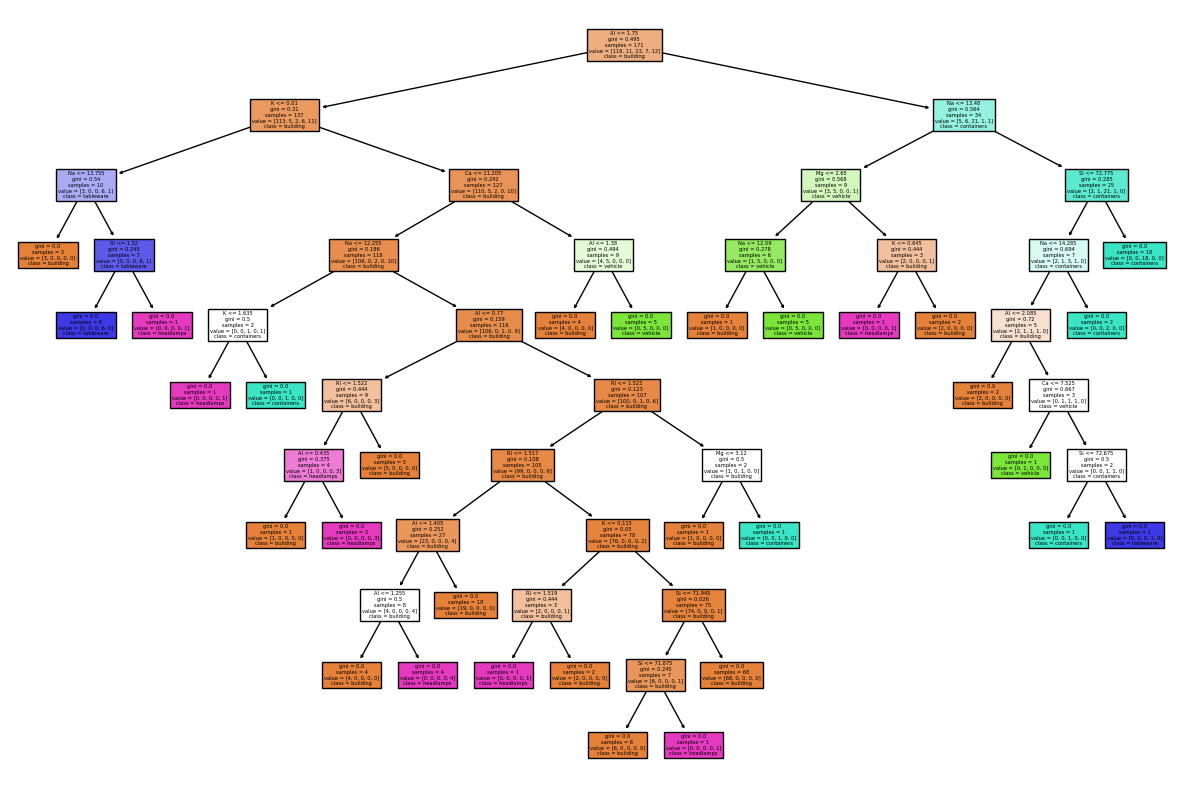

In [73]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(modelDT,feature_names=X.columns,filled=True,class_names=Y.unique())
plt.show()